Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2602 - val_loss: 0.2102
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1289 - val_loss: 0.0238
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - val_loss: 0.0181
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - val_loss: 0.0180
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181 - val_loss: 0.0180
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - val_loss: 0.0180
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - val_loss: 0.0180
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - val_loss: 0.0180
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181 - val_loss: 0.0180
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 - val_loss: 0.0181


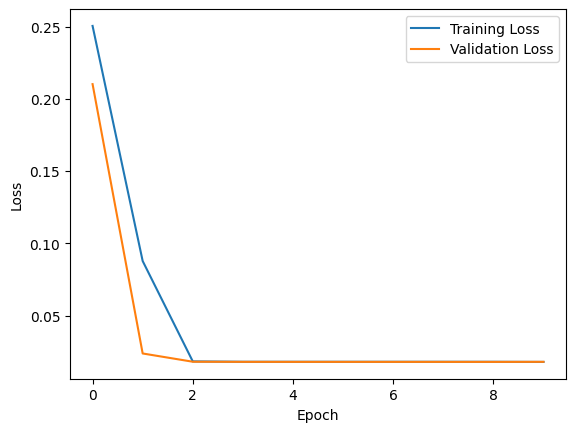

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.0180
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Number of detected anomalies: 355 out of 1000 samples


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# a. Loading and preprocessing the ECG data
# Load the ECG dataset from a CSV file
# Assuming 'ecg_data.csv' contains ECG samples, each row as a sample
ecg_data = pd.read_csv('ecg-csv/ecg.csv')

# Preprocess the data
# Normalize the data between 0 and 1
ecg_data = ecg_data / ecg_data.max().max()  # Normalize to [0, 1]

# Split the data into training and testing sets
train_size = int(0.8 * len(ecg_data))
train_data = ecg_data[:train_size].values
test_data = ecg_data[train_size:].values

# Reshape the data to match the autoencoder input shape
train_data_flat = train_data.reshape(-1, train_data.shape[1])
test_data_flat = test_data.reshape(-1, test_data.shape[1])

# b. Define the model’s architecture (Autoencoder with encoder and decoder)
latent_dim = 64
encoder = models.Sequential([
    layers.Input(shape=(train_data_flat.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(latent_dim, activation='relu')
])

decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data_flat.shape[1], activation='sigmoid')
])

autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

# c. Train the model
history = autoencoder.fit(train_data_flat, train_data_flat,
                          epochs=10, batch_size=256, validation_split=0.1, verbose=1)

# d. Estimating the model’s performance
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Set threshold for detecting anomalies based on reconstruction error
anomaly_threshold = autoencoder.evaluate(test_data_flat, test_data_flat)
mse = np.mean(np.square(test_data_flat - autoencoder.predict(test_data_flat)), axis=1)

# Detect anomalies based on MSE threshold
anomalies = mse > anomaly_threshold
print(f"Number of detected anomalies: {np.sum(anomalies)} out of {len(anomalies)} samples")
